In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_train.csv',index_col='TransactionID')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,0,0,86400,68.5,W,13926,362.555488,150.0,discover,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
2987001,1,1,0,86401,29.0,W,2755,404.000000,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2987002,2,2,0,86469,59.0,W,4663,490.000000,150.0,visa,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2987003,3,3,0,86499,50.0,W,18132,567.000000,150.0,mastercard,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
2987004,4,4,0,86506,50.0,H,4497,514.000000,150.0,mastercard,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

## Data Exploration

In [12]:
df['isFraud'].value_counts()

0    515169
1     17838
Name: isFraud, dtype: int64

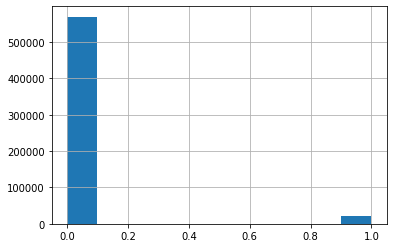

In [5]:
# imbalanced dataset
df['isFraud'].hist()
plt.show()

In [6]:
# explore categorical features
df.select_dtypes(include='O')

,ProductCD,card4,card6,P_emaildomain
TransactionID,,,,
2987000,W,discover,credit,gmail.com
2987001,W,mastercard,credit,gmail.com
2987002,W,visa,debit,outlook.com
2987003,W,mastercard,debit,yahoo.com
2987004,H,mastercard,credit,gmail.com
...,...,...,...,...
3577535,W,visa,debit,gmail.com
3577536,W,mastercard,debit,gmail.com
3577537,W,mastercard,debit,gmail.com


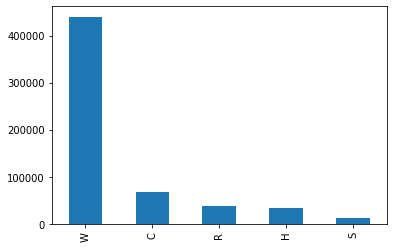

In [7]:
# Product code count
df['ProductCD'].value_counts().plot(kind='bar')
plt.show()

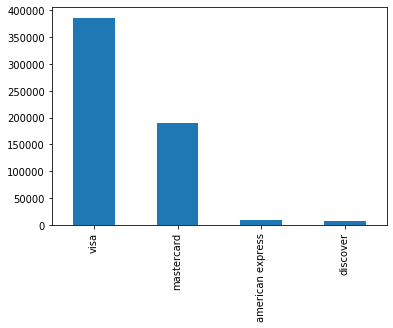

In [8]:
# credit card count
df['card4'].value_counts().plot(kind='bar')

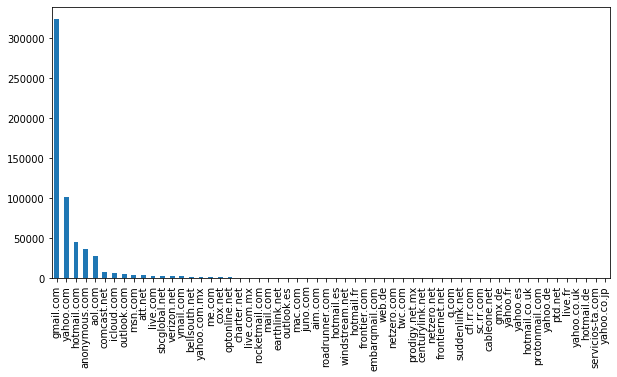

In [9]:
# email distribution
df['P_emaildomain'].value_counts().plot(kind='bar', figsize=(10,5))
plt.show()

In [10]:
# explore numeric features
df.select_dtypes(exclude='O')

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.50,13926,362.555488,150.0,142.0,315.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
2987001,0,86401,29.00,2755,404.000000,150.0,102.0,325.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2987002,0,86469,59.00,4663,490.000000,150.0,166.0,330.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2987003,0,86499,50.00,18132,567.000000,150.0,117.0,476.0,87.0,2.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
2987004,0,86506,50.00,4497,514.000000,150.0,102.0,420.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,0,15811047,49.00,6550,362.555488,150.0,226.0,272.0,87.0,2.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
3577536,0,15811049,39.50,10444,225.000000,150.0,224.0,204.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3577537,0,15811079,30.95,12037,595.000000,150.0,224.0,231.0,87.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


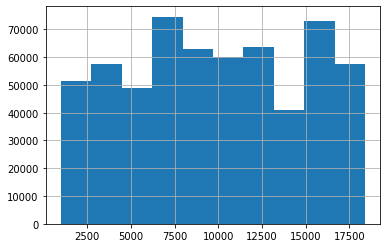

In [11]:
df['card1'].hist()

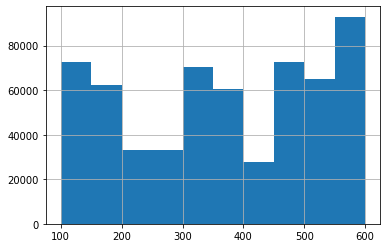

In [12]:
df['card2'].hist()

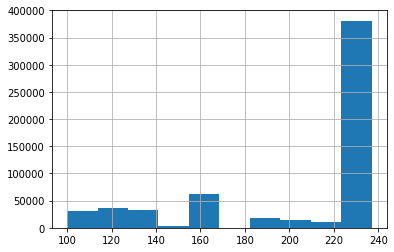

In [13]:
df['card5'].hist()

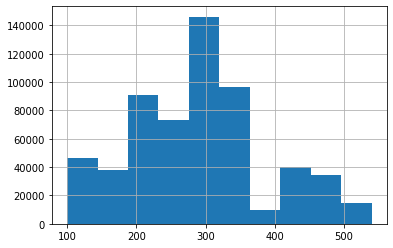

In [14]:
df['addr1'].hist()

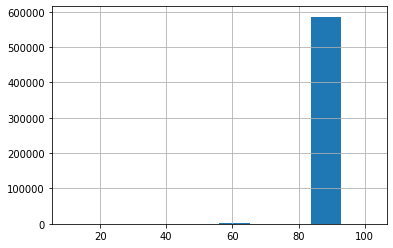

In [15]:
df['addr2'].hist()

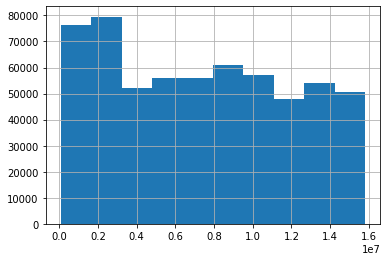

In [16]:
df['TransactionDT'].hist()

In [17]:
# TransactionAmt have some outliers
print('mean',df['TransactionAmt'].mean())
print('max',df['TransactionAmt'].max())
print('min',df['TransactionAmt'].min())
print('mode',df['TransactionAmt'].mode())
print('median',df['TransactionAmt'].median())

mean 135.02717637247264
max 31937.391
min 0.251
mode 0    59.0
dtype: float64
median 68.769


In [18]:
df.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,590540.000000,5.905400e+05,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,...,590540.00000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,14.092458,...,39.17391,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584
std,0.183755,4.617224e+06,239.162522,4901.170153,156.595240,11.321413,41.095455,95.914128,2.536525,133.569018,...,172.12659,95.799872,173.432384,116.727602,2270.010138,3980.002390,2793.315255,332.301472,473.494496,382.049290
min,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.027058e+06,43.321000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,290.733794,87.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,327.000000,87.000000,3.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,4685.000000,...,55125.00000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000


## Exploring outliers

In [19]:
df[(df['TransactionAmt'] < df['TransactionAmt'].quantile(0.025))].shape

(14715, 200)

In [20]:
df[(df['TransactionAmt'] > df['TransactionAmt'].quantile(0.975))].shape

(14764, 200)

In [21]:
df[(df['TransactionDT'] < df['TransactionDT'].quantile(0.025))].shape

(14764, 200)

In [22]:
df[(df['TransactionDT'] > df['TransactionDT'].quantile(0.975))].shape

(14764, 200)

In [23]:
# dropping outliers
df.drop(df[(df['TransactionAmt'] > df['TransactionAmt'].quantile(0.975)) 
           | (df['TransactionAmt'] < df['TransactionAmt'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['TransactionDT'] > df['TransactionDT'].quantile(0.975)) 
           | (df['TransactionDT'] < df['TransactionDT'].quantile(0.025))].index, inplace=True)

In [24]:
df.shape

(533007, 200)

In [25]:
# Exploring test dataset
test = pd.read_csv('final_test.csv',index_col='TransactionID')
test.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [26]:
test.describe()

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.066910e+05,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,...,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000
mean,2.692994e+07,134.725568,9957.222175,363.735379,153.543409,200.162975,291.846514,86.723412,10.093211,10.714635,...,42.733066,21.238136,43.269524,26.730428,42.077887,83.808337,56.090776,27.620156,46.835629,36.772511
std,4.756507e+06,245.779822,4884.960969,157.327657,12.406097,40.380048,95.225923,2.787218,79.334547,88.896658,...,467.653243,94.097556,194.424377,114.985818,2249.331438,2919.409384,2263.805246,999.897485,1514.923260,1486.810367
min,1.840322e+07,0.018000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.277154e+07,40.000000,6019.000000,215.000000,150.000000,166.000000,205.000000,87.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.720466e+07,67.950000,9803.000000,363.735379,150.000000,226.000000,291.846514,87.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.134856e+07,125.000000,14276.000000,512.000000,150.000000,226.000000,327.000000,87.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.421434e+07,10270.000000,18397.000000,600.000000,232.000000,237.000000,540.000000,102.000000,2950.000000,3275.000000,...,167200.000000,4727.959961,7539.750000,4727.959961,718740.000000,958320.000000,718740.000000,453750.000000,605000.000000,605000.000000


In [27]:
# TransactionAmt have some outliers
print('mean',test['TransactionAmt'].mean())
print('max',test['TransactionAmt'].max())
print('min',test['TransactionAmt'].min())
print('mode',test['TransactionAmt'].mode())
print('median',test['TransactionAmt'].median())

mean 134.72556825757712
max 10270.0
min 0.018000000000000002
mode 0    59.0
dtype: float64
median 67.95


In [28]:
test[(test['TransactionAmt'] < test['TransactionAmt'].quantile(0.025))].shape

(12643, 199)

In [29]:
test[(test['TransactionAmt'] > test['TransactionAmt'].quantile(0.975))].shape

(12666, 199)

In [30]:
test[(test['TransactionDT'] < test['TransactionDT'].quantile(0.025))].shape

(12668, 199)

In [31]:
test[(test['TransactionDT'] > test['TransactionDT'].quantile(0.975))].shape

(12668, 199)

In [32]:
# dropping outliers
test.drop(test[(test['TransactionAmt'] > test['TransactionAmt'].quantile(0.975)) 
           | (test['TransactionAmt'] < test['TransactionAmt'].quantile(0.025))].index,inplace=True)
test.drop(test[(test['TransactionDT'] > test['TransactionDT'].quantile(0.975)) 
           | (test['TransactionDT'] < test['TransactionDT'].quantile(0.025))].index, inplace=True)

In [33]:
test.shape

(457312, 199)

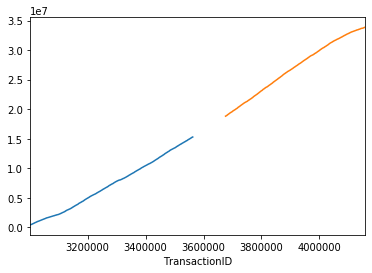

In [34]:
# train, test Transaction Time diff
df['TransactionDT'].plot()
test['TransactionDT'].plot()

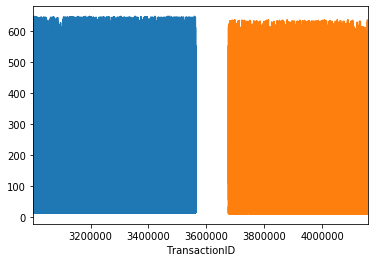

In [35]:
df['TransactionAmt'].plot()
test['TransactionAmt'].plot()

In [82]:
# # creating dummies
# df = pd.get_dummies(df)

In [83]:
# test = pd.get_dummies(test)

In [38]:
# # save train,test with dummies as pickle
# import pickle 
# pickle_out = open("train_dummy.pickle","wb")
# pickle.dump(df, pickle_out)

# pickle_out = open("test_dummy.pickle","wb")
# pickle.dump(test, pickle_out)
# pickle_out.close()

In [49]:
# del df, test
gc.collect()

1081

## Modeling 

In [2]:
# basic packages
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('datasets/train_dummy.pickle')
test = pd.read_pickle('datasets/test_dummy.pickle')

In [4]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score, recall_score
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [5]:
# target, X
y = df['isFraud']
X = df.drop('isFraud',axis=1)

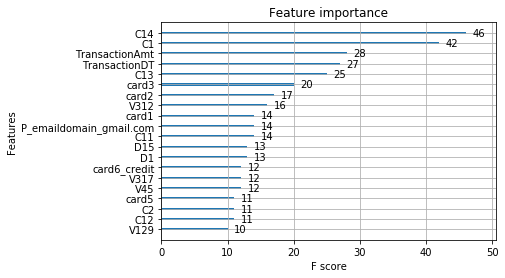

In [6]:
# feature selection with XGBoost

from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import plot_importance

clf = XGBClassifier(n_estimators=100)
clf = clf.fit(X, y)



In [ ]:
plot_importance(clf,max_num_features=20)
plt.show()

In [27]:
# # Select From Model
# model = SelectFromModel(clf, prefit=True)
# X_new = model.transform(X)
# X_new.shape        

(533007, 68)

In [28]:
# save selected features
# import pickle 
# pickle_out = open("X_new.pickle","wb")
# pickle.dump(X_new, pickle_out)
# pickle_out.close()

In [6]:
X_new = pd.read_pickle('datasets/X_new.pickle')
X_new.shape

(533007, 68)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=1)

In [60]:
# light gbm grid search

import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from imblearn.over_sampling import SMOTE



y = df['isFraud']
X = pd.read_pickle('datasets/X_new.pickle')

smt = SMOTE(sampling_strategy='minority',random_state=1)
X_resampled, y_resampled = smt.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size=0.2,
                                                 random_state=1)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval)


model = lgb.LGBMClassifier( 
    boosting_type="gbdt",
    metrics='auc',
    is_unbalance=True, 
    random_state=10, 
    n_estimators=50,
    num_leaves=30, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)
scoring = {'AUC': 'roc_auc'}

# Create the grid

params_opt = {'n_estimators':range(200, 600, 80), 'num_leaves':range(20,60,10)}
gridSearchCV = GridSearchCV(estimator = model, 
    param_grid = params_opt, 
    scoring='roc_auc',
    n_jobs=4,
    iid=False, 
    verbose=1,
    cv=3)

gridSearchCV.fit(X_train,y_train,)

[1]	valid_0's binary_logloss: 0.618842	valid_0's auc: 0.968974
[2]	valid_0's binary_logloss: 0.557357	valid_0's auc: 0.978979
[3]	valid_0's binary_logloss: 0.502502	valid_0's auc: 0.982929
[4]	valid_0's binary_logloss: 0.457572	valid_0's auc: 0.983572
[5]	valid_0's binary_logloss: 0.418021	valid_0's auc: 0.984759
[6]	valid_0's binary_logloss: 0.386218	valid_0's auc: 0.9853
[7]	valid_0's binary_logloss: 0.356535	valid_0's auc: 0.985722
[8]	valid_0's binary_logloss: 0.330108	valid_0's auc: 0.986515
[9]	valid_0's binary_logloss: 0.306965	valid_0's auc: 0.987038
[10]	valid_0's binary_logloss: 0.285905	valid_0's auc: 0.98769
[11]	valid_0's binary_logloss: 0.267704	valid_0's auc: 0.988242
[12]	valid_0's binary_logloss: 0.251138	valid_0's auc: 0.988445
[13]	valid_0's binary_logloss: 0.236308	valid_0's auc: 0.989062
[14]	valid_0's binary_logloss: 0.223232	valid_0's auc: 0.989309
[15]	valid_0's binary_logloss: 0.211567	valid_0's auc: 0.989656
[16]	valid_0's binary_logloss: 0.200768	valid_0's au

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 42.3min finished


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [62]:
print('Best parameters found by grid search are:', gridSearchCV.best_params_)
print('Best score found by grid search is:', gridSearchCV.best_score_)

y_hat = gridSearchCV.predict(X_test)

print('AUC',roc_auc_score(y_test,y_hat))

Best parameters found by grid search are: {'n_estimators': 520, 'num_leaves': 50}
Best score found by grid search is: 0.9949248207215131
AUC 0.9786520882575676


In [8]:
# light gbm grid search

import pandas as pd
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt

# sklearn tools for model training and assesment
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from imblearn.over_sampling import SMOTE



y = df['isFraud']
X = pd.read_pickle('datasets/X_new.pickle')

smt = SMOTE(sampling_strategy='minority',random_state=1)
X_resampled, y_resampled = smt.fit_resample(X, y)

X_train,X_test,y_train,y_test = train_test_split(X_resampled,
                                                 y_resampled,
                                                 test_size=0.2,
                                                 random_state=1)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


model = lgb.LGBMClassifier( 
    boosting_type="gbdt",
    metrics='auc',
    is_unbalance=False, 
    random_state=10, 
    n_estimators=520,
    num_leaves=50, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)
scoring = {'AUC': 'roc_auc'}

model.fit(X_train,y_train)
y_hat = model.predict(X_test)

print('AUC',roc_auc_score(y_test,y_hat))

/Users/abdygaziev/anaconda3/envs/learn-env/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


AUC 0.9786224924130851


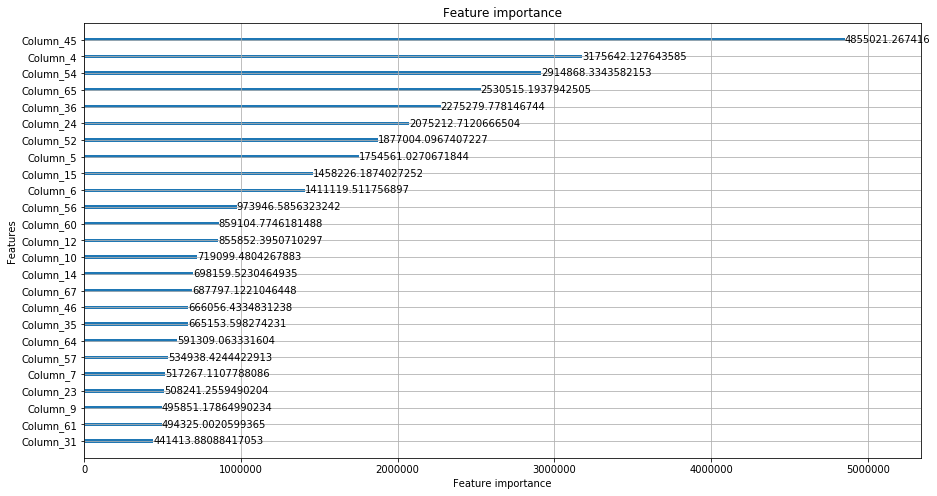

In [68]:
plot_importance(model,max_num_features=25,importance_type='gain',figsize=(15,8))

In [ ]:
# from lightgbm import plotting
# plotting.plot_tree(model,figsize=(150,100)) # plot decision tree

# Plotting decision regions
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

tt = 'LightGBM'
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
axarr[idx[0], idx[1]].scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                              s=20, edgecolor='k')
axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [8]:
# resampling with RandomOverSampler, SVM

from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC

ros = RandomOverSampler(random_state=0) #resampling
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

clf = LinearSVC() # fitting
clf.fit(X_resampled, y_resampled)
y_pred=clf.predict(X_test)

#scores
print(confusion_matrix(y_test, y_pred))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

/Users/abdygaziev/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[101102   1933]
 [  3371    196]]
Recall 0.09206200093940817
Precision 0.054948135688253436
AUC_ROC 0.5298976454401749
              precision    recall  f1-score   support

           0       0.97      0.98      0.97    103035
           1       0.09      0.05      0.07      3567

    accuracy                           0.95    106602
   macro avg       0.53      0.52      0.52    106602
weighted avg       0.94      0.95      0.94    106602



In [33]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf = BalancedRandomForestClassifier(n_estimators=150,max_depth=3, random_state=0,min_samples_split=10)
clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

[[82249 20786]
 [  994  2573]]
Recall 0.11015026328181857
Precision 0.7213344547238576
Accuracy 0.795688636235718
AUC_ROC 0.5491046596492704
              precision    recall  f1-score   support

           0       0.99      0.80      0.88    103035
           1       0.11      0.72      0.19      3567

    accuracy                           0.80    106602
   macro avg       0.55      0.76      0.54    106602
weighted avg       0.96      0.80      0.86    106602



In [9]:
# Applign DecTreeClf without ADASYN

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import ADASYN

clf = DecisionTreeClassifier(random_state=42)
adasyn = ADASYN(random_state=0) #resampling
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

clf.fit(X_resampled,y_resampled)
y_pred = clf.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(classification_report(y_test, y_pred))


[[100989   2046]
 [  1670   1897]]
Recall 0.48110575703778846
Precision 0.5318194561255958
AUC_ROC 0.7324191542472765
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    103035
           1       0.48      0.53      0.51      3567

    accuracy                           0.97    106602
   macro avg       0.73      0.76      0.74    106602
weighted avg       0.97      0.97      0.97    106602



In [10]:
#  pipline , resampling data with final estimator
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline 

# y = df['isFraud']
# X = df.drop('isFraud',axis=1)

# pca = PCA(n_components=100)
# smt = SMOTE(random_state=42)
adasyn = ADASYN(random_state=0) #resampling
rf = RFC(min_samples_split=10)
pipeline = Pipeline([('adasyn', adasyn), ('rfc', rf)])
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

pipeline.fit(X_train, y_train) 
y_hat = pipeline.predict(X_test)

print(classification_report(y_test, y_hat))
print(confusion_matrix(y_test, y_hat))
print('AUC_ROC',roc_auc_score(y_test,y_hat))

/Users/abdygaziev/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    102954
           1       0.87      0.43      0.58      3648

    accuracy                           0.98    106602
   macro avg       0.93      0.72      0.78    106602
weighted avg       0.98      0.98      0.97    106602

[[102726    228]
 [  2070   1578]]
AUC_ROC 0.7151756041021897


In [15]:
# XGboost, SMOTE
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

clf = XGBClassifier(n_estimators=100)
smt = SMOTE(random_state=42)

pipeline = Pipeline([('smt', smt), ('xgboost', clf)])

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print('Recall', recall_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_pred,y_test))

[[102923    112]
 [  2593    974]]
Recall 0.2730585926548921
Precision 0.8968692449355433
AUC_ROC 0.6359857916930984
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    103035
           1       0.90      0.27      0.42      3567

    accuracy                           0.97    106602
   macro avg       0.94      0.64      0.70    106602
weighted avg       0.97      0.97      0.97    106602

0.9746252415526914


In [19]:
# stacking ensemlbe learning

from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score

import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=1)
clf3 = XGBClassifier()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

print('3-fold cross validation:\n')



for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'XGBoost',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X_resampled, y_resampled, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    
    
sclf.fit(X_resampled,y_resampled)
y_hat = sclf.predict(X_test)
print(confusion_matrix(y_test, y_hat))
print('Recall', recall_score(y_test,y_hat))
print('Precision',precision_score(y_test,y_hat))
print('AUC_ROC',roc_auc_score(y_test,y_hat))
print(classification_report(y_test, y_hat))
print(accuracy_score(y_test,y_hat))

3-fold cross validation:

Accuracy: 0.88 (+/- 0.00) [KNN]
Accuracy: 0.99 (+/- 0.01) [Random Forest]
Accuracy: 0.96 (+/- 0.01) [XGBoost]
Accuracy: 0.99 (+/- 0.01) [StackingClassifier]
[[102713    322]
 [  1854   1713]]
Recall 0.4802354920100925
Precision 0.8417690417690418
AUC_ROC 0.7385551701812971
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    103035
           1       0.84      0.48      0.61      3567

    accuracy                           0.98    106602
   macro avg       0.91      0.74      0.80    106602
weighted avg       0.98      0.98      0.98    106602

0.9795876249976548


In [20]:
# stacking ensemlbe learning

from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score

import numpy as np
import warnings

warnings.simplefilter('ignore')

clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(n_estimators=100,random_state=1)
clf3 = GaussianNB()
sgdc = SGDClassifier()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=sgdc)

smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

print('3-fold cross validation:\n')



for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = cross_val_score(clf, X_resampled, y_resampled, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    
    
sclf.fit(X_resampled,y_resampled)
y_hat = sclf.predict(X_test)
print(confusion_matrix(y_test, y_hat))
print('Recall', recall_score(y_test,y_hat))
print('Precision',precision_score(y_test,y_hat))
print('AUC_ROC',roc_auc_score(y_test,y_hat))
print(classification_report(y_test, y_hat))
print(accuracy_score(y_test,y_hat))

3-fold cross validation:

Accuracy: 0.87 (+/- 0.00) [KNN]
Accuracy: 0.99 (+/- 0.01) [Random Forest]
Accuracy: 0.49 (+/- 0.00) [Naive Bayes]
Accuracy: 0.99 (+/- 0.01) [StackingClassifier]
[[102734    301]
 [  1750   1817]]
Recall 0.5093916456405944
Precision 0.8578847969782813
AUC_ROC 0.7532351541154881
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    103035
           1       0.86      0.51      0.64      3567

    accuracy                           0.98    106602
   macro avg       0.92      0.75      0.81    106602
weighted avg       0.98      0.98      0.98    106602

0.9807602108778447


Starting training...
[1]	valid_0's auc: 0.83038
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.838034
[3]	valid_0's auc: 0.838415
[4]	valid_0's auc: 0.841641
[5]	valid_0's auc: 0.841834
[6]	valid_0's auc: 0.84227
[7]	valid_0's auc: 0.842256
[8]	valid_0's auc: 0.843816
[9]	valid_0's auc: 0.843916
[10]	valid_0's auc: 0.845371
[11]	valid_0's auc: 0.846366
[12]	valid_0's auc: 0.846081
[13]	valid_0's auc: 0.846122
[14]	valid_0's auc: 0.846648
[15]	valid_0's auc: 0.846781
[16]	valid_0's auc: 0.84756
[17]	valid_0's auc: 0.847556
[18]	valid_0's auc: 0.848104
[19]	valid_0's auc: 0.848161
[20]	valid_0's auc: 0.848487
Did not meet early stopping. Best iteration is:
[20]	valid_0's auc: 0.848487
Saving model...
Starting predicting...
AUC_ROC 0.8484872878619899


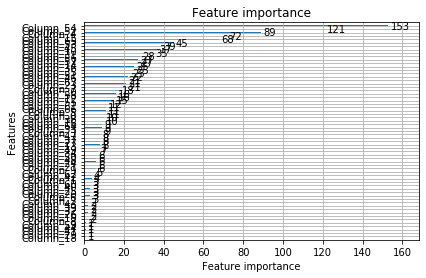

In [51]:
# lightgbm

import lightgbm as lgb
from lightgbm import plot_importance
import pandas as pd
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

lgb_train = lgb.Dataset(X_resampled, y_resampled)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {'num_leaves':60,
        'min_child_samples': 30,
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'objective': 'binary',
        'max_depth': 13,
        'learning_rate': 0.03,
        "subsample_freq": 3,
        "subsample": 0.9,
        "bagging_seed": 11,
        "metric": 'auc',
        "verbosity": -1,
        'reg_alpha': 0.3,
        'reg_lambda': 0.3,
        'colsample_bytree': 0.9,
}

print('Starting training...')

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('mod_1.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
# print('Accuracy',accuracy_score(y_test,y_pred,normalize=False))
print('AUC_ROC',roc_auc_score(y_test,y_pred))
plot_importance(gbm)
# print(classification_report(y_test, y_pred))

In [10]:
# stacking model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from vecstack import stacking

clf1 = ExtraTreesClassifier(n_estimators=100, max_depth=3,random_state=0, n_jobs=-1)
clf2 = RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=3)
clf3 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=3)

smt = SMOTE(random_state=42,sampling_strategy='minority',k_neighbors=3)

X_resampled, y_resampled = smt.fit_resample(X_train, y_train)

models = [clf1,clf2,clf3]




S_train, S_test = stacking(models,                     # list of models
                           X_resampled, y_resampled, X_test,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and vote
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=roc_auc_score,      # metric: callable
                           n_folds=4,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)                  # print all info



task:         [classification]
n_classes:    [2]
metric:       [roc_auc_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.76190869]
    fold  1:  [0.75992876]
    fold  2:  [0.75975658]
    fold  3:  [0.75942174]
    ----
    MEAN:     [0.76025394] + [0.00097261]
    FULL:     [0.76025395]

model  1:     [RandomForestClassifier]
    fold  0:  [0.86944601]
    fold  1:  [0.87014481]
    fold  2:  [0.86946415]
    fold  3:  [0.87090059]
    ----
    MEAN:     [0.86998889] + [0.00059699]
    FULL:     [0.86998889]

model  2:     [XGBClassifier]
    fold  0:  [0.96105169]
    fold  1:  [0.96158064]
    fold  2:  [0.96003222]
    fold  3:  [0.96096396]
    ----
    MEAN:     [0.96090713] + [0.00055750]
    FULL:     [0.96090713]



In [15]:
# Initialize 2nd level model
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
# Fit 2nd level model
model = model.fit(S_train, y_resampled)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % roc_auc_score(y_test, y_pred))

Starting training...
[1]	valid_0's auc: 0.770078
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.79471
[3]	valid_0's auc: 0.794519
[4]	valid_0's auc: 0.79471
[5]	valid_0's auc: 0.79471
[6]	valid_0's auc: 0.79471
[7]	valid_0's auc: 0.79471
Early stopping, best iteration is:
[2]	valid_0's auc: 0.79471
Starting predicting...
AUC_ROC 0.5
